# About Dataset
> Content

> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

>Time period: Donated to UCI ML 27 April 1987
>Inspiration
1. What types of machine learning models perform best on this dataset?
2. Which features are most indicative of a poisonous mushroom?


> Attribute Information: (classes: edible=e, poisonous=p)
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Import Library

In [53]:
# import standar library
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

In [54]:
# loading data menjadi df
df = pd.read_csv('/content/mushrooms.csv')

In [55]:
# menampilkan dataset teratas
df.head()

class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]

In [56]:
# menunjukan banyaknya kolom dan baris
df.shape

(8124, 23)

In [57]:
#menampilkan nama kolom dari dataset
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [58]:
# mencari apakah ada nan atau null value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [59]:
# melihat null value false true
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [60]:
# menampilkan deskripsi sederhana 
df.describe()

class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]

> Tentang dataset
1. terdapat 23 kolom dan 8124 baris yang ada pada dataset mushroom.
2. pada dataset mushroom tidak terdapat null value..
3. unique value terbanyak muncul pada feature gill-color sebanyak 12, dan terendah yaitu hanya 1 pada veil-type dengan value partial.
4. tiap feature memiliki unique value yang sudah tertera pada deskripsi sebelumnya. 

# Exploration Data Analysis

Class Mushroom

In [61]:
# mendeklarasi feature class menjadi df_ep
df_ep = df['class']

# mengganti nama dari unique value feature class
df_ep = df_ep.replace({'p':'poisonous', 'e':'edible'})

# plot figur feature class
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Class")
sns.countplot(df_ep,hue=df_ep)

plt.subplot(122)
plt.title("Prosentase Class")
plt.pie(df_ep.value_counts(),labels=df_ep.unique(),autopct="%.2f")
plt.show()

# menampilkan unique value feature class dan jumlahnya
print('Unique value dari feature class:',df['class'].unique())
print(df_ep.value_counts())



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Unique value dari feature class: ['p' 'e']
edible       4208
poisonous    3916
Name: class, dtype: int64


Color of mushroom

In [62]:
# mendeklarasi feature cap-color menjadi df_capcol
df_capcol = df['cap-color']

# mengganti nama dari unique value feature cap-color
df_capcol = df_capcol.replace({'n':'brown', 'y':'yellow', 'w':'white', 'g':'gray', 
                           'e':'red', 'p':'pink', 'b':'buff', 'u':'purple', 
                           'c':'cinnamon', 'r':'green'})
# plot figur feature cap-color
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Cap Color")
sns.countplot(df_capcol)
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("Jumlah Tiap Cap Color berdasar Class")
sns.countplot(df_capcol, hue=df_ep)
plt.xticks(rotation=45)
plt.show()

# menampilkan unique value feature cap-color dan jumlahnya
print('Unique value dari feature cap-solor:',df['cap-color'].unique())
print(df_capcol.value_counts())


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Unique value dari feature cap-solor: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64


Mushroom's odor

In [63]:
# mendeklarasi feature odor menjadi df_odor 
df_odor = df['odor']

# mengganti nama dari unique value feature odor
df_odor = df_odor.replace({'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 
                           'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent', 
                           's':'spicy'})

# plot figur feature odor
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Odor")
sns.countplot(df_odor)
plt.xticks(rotation=45)

plt.subplot(122)
plt.title("Jumlah Tiap Odor Berdasarkan Class")
sns.countplot(df_odor, hue=df_ep)
plt.xticks(rotation=45)
plt.show()

# menampilkan unique value feature cap-color dan jumlahnya
print('Unique value dari feature odor:',df['odor'].unique())
print(df_odor.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Unique value dari feature odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
none        3528
foul        2160
fishy        576
spicy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64


Mushroom's Gill color

In [64]:
# mendeklarasi feature gill-color menjadi df_gc
df_gc = df['gill-color']

# mengganti nama dari unique value feature gill-color
df_gc = df_gc.replace({'k':'black', 'n':'brown', 'b':'buff', 'f':'chocolate', 
                           'g':'gray', 'r':'green', 'o':'orange', 'p':'pink', 
                           'u':'purple','e':'red','w':'white','y':'yellow'})

# plot figur feature gill-color
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Gill Color")
sns.countplot(df_gc)
plt.xticks(rotation=45)

plt.subplot(122)
plt.title("Jumlah Tiap Gill Color Berdasarkan Class")
sns.countplot(df_gc, hue=df_ep)
plt.xticks(rotation=45)
plt.show()

# menampilkan unique value feature gill-color dan jumlahnya
print('Unique value dari feature gill-color:',df['gill-color'].unique())
print(df_gc.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Unique value dari feature gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
buff      1728
pink      1492
white     1202
brown     1048
gray       752
h          732
purple     492
black      408
red         96
yellow      86
orange      64
green       24
Name: gill-color, dtype: int64


Mushroom Habitat and Population

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Unique value dari feature population: ['s' 'n' 'a' 'v' 'y' 'c']
several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


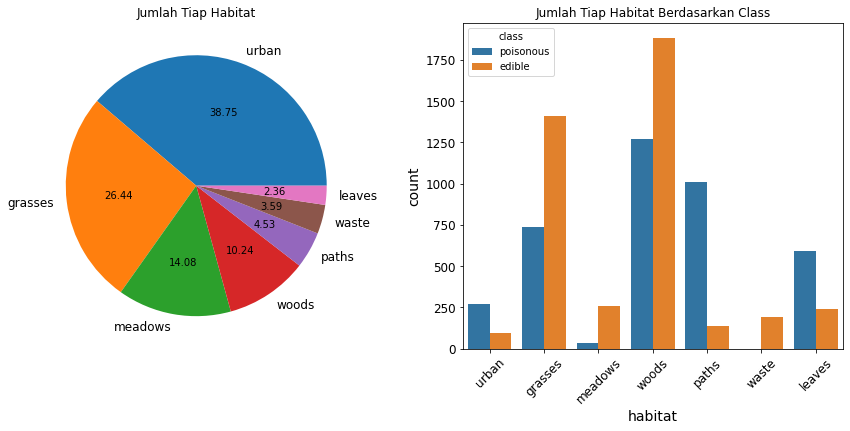

Unique value dari feature population: ['u' 'g' 'm' 'd' 'p' 'w' 'l']
woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64


In [65]:
# mendeklarasi feature population menjadi df_pop,feature habitat menjadi df_h
df_pop = df['population']
df_h = df['habitat']

# mengganti nama dari unique value feature habitat dan population
df_pop = df_pop.replace({'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 
                           'v':'several', 'y':'solitary'})

df_h = df_h.replace({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 
                           'u':'urban', 'w':'waste','d':'woods'})

# plot figur feature population
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Population")
plt.pie(df_pop.value_counts(),labels=df_pop.unique(),autopct="%.2f")
plt.xticks(rotation=45)

plt.subplot(122)
plt.title("Jumlah Tiap Population Berdasarkan Class")
sns.countplot(df_pop, hue=df_ep)
plt.xticks(rotation=45)
plt.show()

# menampilkan unique value feature population dan jumlahnya
print('Unique value dari feature population:',df['population'].unique())
print(df_pop.value_counts())

# plot figur feature habitat
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Jumlah Tiap Habitat")
plt.pie(df_h.value_counts(),labels=df_h.unique(),autopct="%.2f",)
plt.xticks(rotation=45)

plt.subplot(122)
plt.title("Jumlah Tiap Habitat Berdasarkan Class")
sns.countplot(df_h, hue=df_ep)
plt.xticks(rotation=45)
plt.show()

# menampilkan unique value feature habitat dan jumlahnya
print('Unique value dari feature population:',df['habitat'].unique())
print(df_h.value_counts())

In [66]:
# menampilkan unique value pada feature categorical
for col in df:
  print(col)
  print(df[col].value_counts())
  print()

class
e    4208
p    3916
Name: class, dtype: int64

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

stalk-root
b 

>menampilkan beberapa feature dengan dengan menggunakan figure 
1. feature class menunjukan jumlah unique value edible 4208 dan poisonous 3916 dimana perbadingannya adalah 51.80% dibanding dengan 48.20%.
2. feature cap color menunjan jumlah unique value tertinggi adalah brown dengan 2284, dan terkecil adalah green dan purple dengan nilai yang sama 16.
3. feature odor menunjan jumlah unique value tertinggi adalah none dengan 3528, dan terkecil adalah musty dengan nilai 36.
4. feature gill color menunjan jumlah unique value tertinggi adalah buff dengan 1728, dan terkecil adalah green dengan nilai 24.
5. feature population menunjan jumlah unique value tertinggi adalah several dengan 4040 dan prosentasenya 49.73%, dan terkecil adalah clustered dengan nilai 340 dan prosentasenya 4.19%.
6. feature habitat menunjan jumlah unique value tertinggi adalah woods dengan 3148 dan prosentasenya 38.75%, dan terkecil adalah waste dengan nilai 192 dan prosentasenya 2.36%. 
7. Berkaitan dengan tidak ditampilkannya feature lain secara spesifik, informasi unique value dan jumlah telah disajikan guna mempermudah memahami tiap feature yang ada.


#Preprocessing

Pada tahap preprocessing akan dibuat feature enginering dengan menggunakan Label Encoder dan One Hot Encoder untuk mengetahui apakah ada perbedaan hasil yang akan didapat dari keduanya.

LabelEncoder

In [67]:
# copy data df menjadi df_new
df_new=df.copy()

In [68]:
# melakukan label encoding dari categorical menjadi numerikal / feature enginering
from sklearn.preprocessing import LabelEncoder

df_new = df_new.apply(LabelEncoder().fit_transform)
df_new.head(3)

class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0      1          5            2  ...                  2           3        5
1      0          5            2  ...                  3           2        1
2      0          0            2  ...                  3           2        3

[3 rows x 23 columns]

In [69]:
# plot semua feature dengan histogram
df_new.hist(bins=10, figsize=(15,15));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


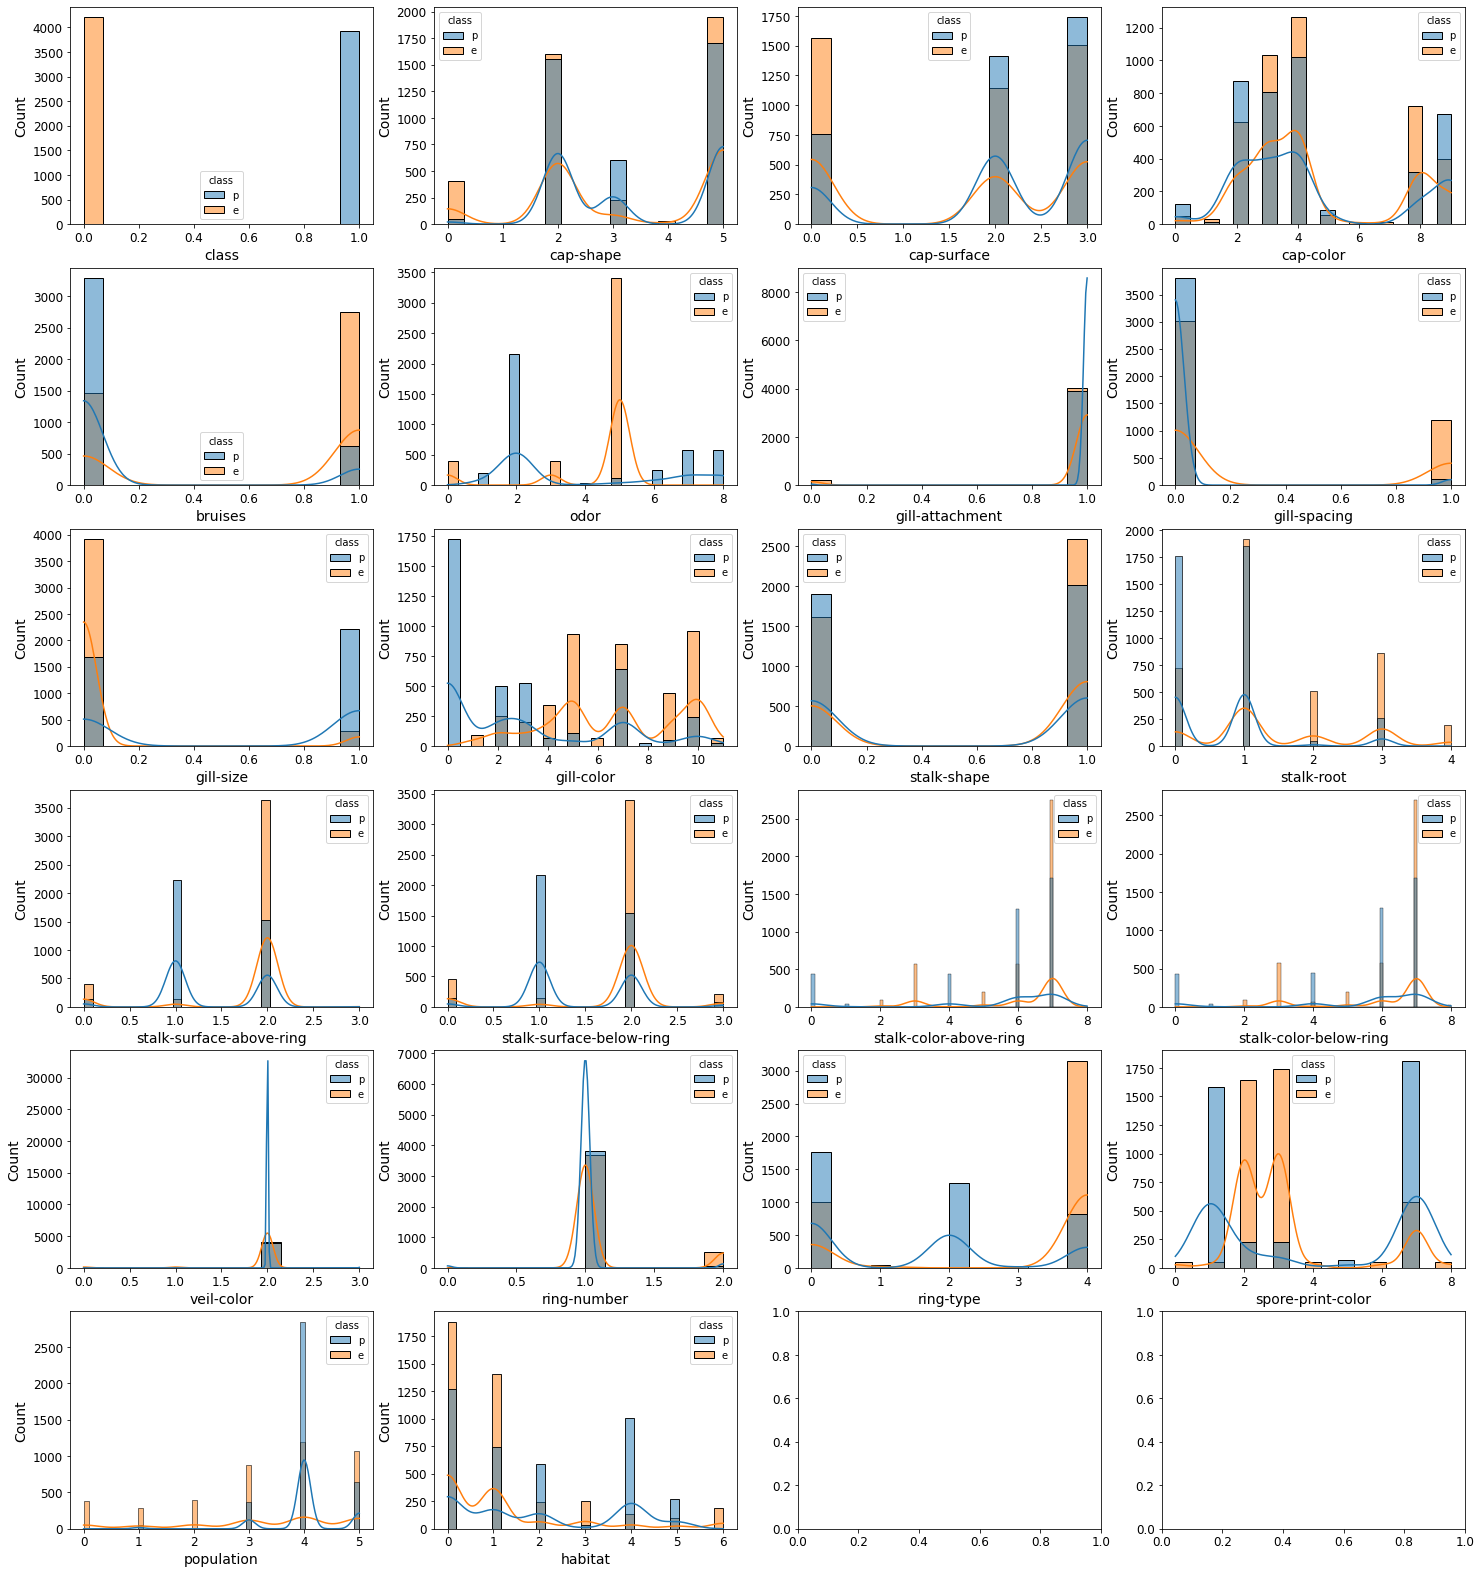

In [70]:
# menampilkan seseluruhan kolom dalam tabel histogram dengan menggunakan target Attrition sebagi warna
cols = df_new.drop(columns=['veil-type'])
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(25,28))

i=0
j=0
for col in cols.columns:
    sns.histplot(data=cols, x=col, hue=df['class'],kde=True,ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0

In [71]:
# deskripsi df_new setelah melakukan label encoding
df_new.describe()

class    cap-shape  ...   population      habitat
count  8124.000000  8124.000000  ...  8124.000000  8124.000000
mean      0.482029     3.348104  ...     3.644018     1.508616
std       0.499708     1.604329  ...     1.252082     1.719975
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     2.000000  ...     3.000000     0.000000
50%       0.000000     3.000000  ...     4.000000     1.000000
75%       1.000000     5.000000  ...     4.000000     2.000000
max       1.000000     5.000000  ...     5.000000     6.000000

[8 rows x 23 columns]

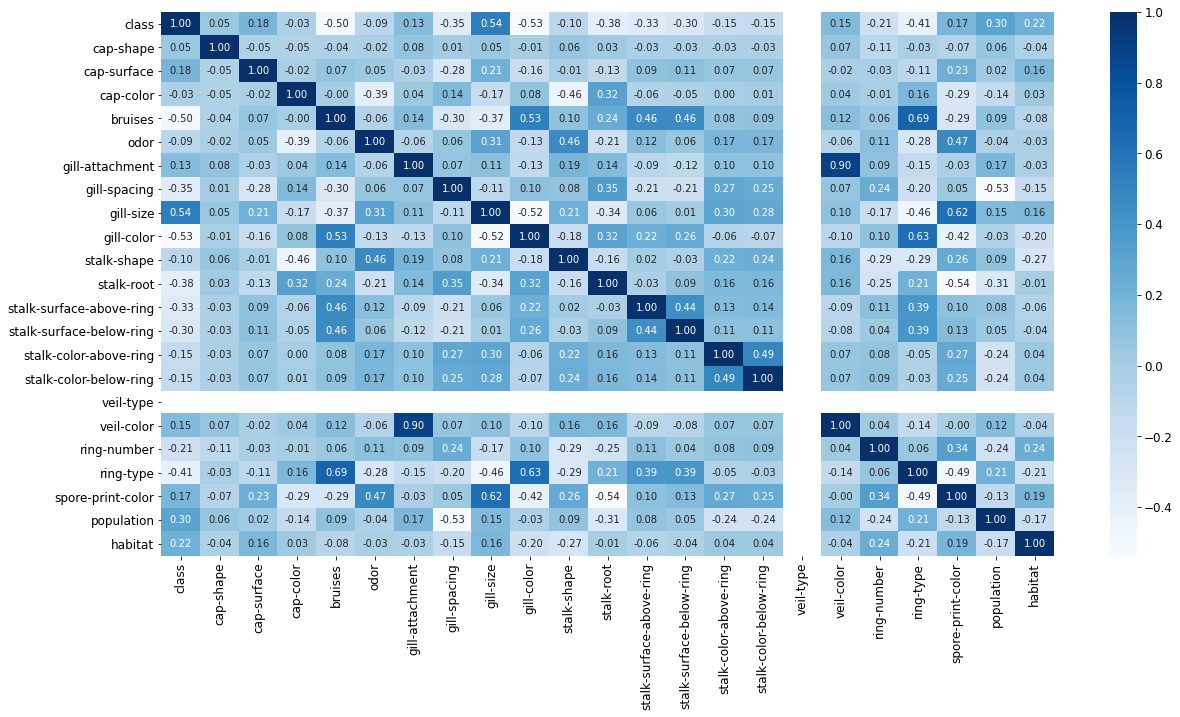

In [72]:
# melakukan plot heatmap dengan correlation tiap feature
plt.subplots(figsize=(20,10))
sns.heatmap(df_new.corr(), annot=True,fmt='.2f', cmap="Blues")

> Pada tahapan preprocessing dapat diketahui:
1. Tiap label yang berupa categorical diubah menjadi numerikal agar mempermudah pemodelan.
2. Pada figur histogram dapat terihat beberapa figur menunjukan left dan right skewness berdasarkan persebaran.
3. Figur countplot dapat kita lihat bahwa feature yang ada kemungkinan memiliki korelasi dengan kondisi poisonous atau edible.
4. Feature veil-type tidak terdapat nilai sehingga tidak dapat dipakai.
5. Heatmap correlation menunjukan hubungan antar feature dimana hubungan yang ada ada yang bersifat korelas positif maupun negatif, serta terdapat feature gill attachment dimana nilai korelasi mendekati 1 dengan feature lain sehingga nantinya tidak digunakan agar tidak terjadi bias.
6. dua feature yang terlah disebutkan gill attachment dan veil type akan didrop.

In [73]:
# melakukan drop feature yang memiliki korelasi mendekati 1 dengan featur lain, dan feature yang tidak memiliki nilai
df_new = df_new.drop(columns=['gill-attachment','veil-type'])

In [74]:
# melakukan split data menjadi X dan y, dimana class digunakan sebagai nilai y atau target

X_le = df_new.drop(columns=['class'], axis=1)
y_le = df_new['class']

In [75]:
# memperlihatkan X_le dan y_le
print('X_le')
print(X_le.shape)
print(X_le.head(3))
print()
print('y_le')
print(y_le.shape)
print(y_le.head(3))

X_le
(8124, 20)
   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3

[3 rows x 20 columns]

y_le
(8124,)
0    1
1    0
2    0
Name: class, dtype: int64


OneHotEncoder

In [76]:
# menyiapkan dataset untuk dilakukan feature enginering
df_new_ohe = df.copy()

In [77]:
# melakukan drop feature yang memiliki korelasi mendekati 1 dengan featur lain, dan feature yang tidak memiliki nilai
df_new_ohe = df_new_ohe.drop(columns=['gill-attachment','veil-type'])

In [78]:
# melakukan label encoder hanya [ada feature class yang akan digunakan sebagai target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_ohe['class'] = le.fit_transform(df_new_ohe['class'])
df_new_ohe.head(3)

class cap-shape cap-surface  ... spore-print-color population habitat
0      1         x           s  ...                 k          s       u
1      0         x           s  ...                 n          n       g
2      0         b           s  ...                 n          n       m

[3 rows x 21 columns]

In [79]:
# melakukan split data menjadi X dan y, dimana class digunakan sebagai nilai y atau target

X_ohe = df_new_ohe.drop(columns=['class'], axis=1)
y_ohe = df_new_ohe['class']

In [80]:
# mempersiapkan onehot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [81]:
# pengaplikasian feature enginering onehotencoder pada feature X
X_ohe = ohe.fit_transform(X_ohe)

In [82]:
# melihat hasil feature enginering X
X_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
# melihat feature name
print(ohe.get_feature_names())

['x0_b' 'x0_c' 'x0_f' 'x0_k' 'x0_s' 'x0_x' 'x1_f' 'x1_g' 'x1_s' 'x1_y'
 'x2_b' 'x2_c' 'x2_e' 'x2_g' 'x2_n' 'x2_p' 'x2_r' 'x2_u' 'x2_w' 'x2_y'
 'x3_f' 'x3_t' 'x4_a' 'x4_c' 'x4_f' 'x4_l' 'x4_m' 'x4_n' 'x4_p' 'x4_s'
 'x4_y' 'x5_c' 'x5_w' 'x6_b' 'x6_n' 'x7_b' 'x7_e' 'x7_g' 'x7_h' 'x7_k'
 'x7_n' 'x7_o' 'x7_p' 'x7_r' 'x7_u' 'x7_w' 'x7_y' 'x8_e' 'x8_t' 'x9_?'
 'x9_b' 'x9_c' 'x9_e' 'x9_r' 'x10_f' 'x10_k' 'x10_s' 'x10_y' 'x11_f'
 'x11_k' 'x11_s' 'x11_y' 'x12_b' 'x12_c' 'x12_e' 'x12_g' 'x12_n' 'x12_o'
 'x12_p' 'x12_w' 'x12_y' 'x13_b' 'x13_c' 'x13_e' 'x13_g' 'x13_n' 'x13_o'
 'x13_p' 'x13_w' 'x13_y' 'x14_n' 'x14_o' 'x14_w' 'x14_y' 'x15_n' 'x15_o'
 'x15_t' 'x16_e' 'x16_f' 'x16_l' 'x16_n' 'x16_p' 'x17_b' 'x17_h' 'x17_k'
 'x17_n' 'x17_o' 'x17_r' 'x17_u' 'x17_w' 'x17_y' 'x18_a' 'x18_c' 'x18_n'
 'x18_s' 'x18_v' 'x18_y' 'x19_d' 'x19_g' 'x19_l' 'x19_m' 'x19_p' 'x19_u'
 'x19_w']


Split Data

In [84]:
# deklarasi random state
random_state = 42

LabelEncoder

In [85]:
# melakukan split data menjadi train test dan validation label Enncoder
from sklearn.model_selection import train_test_split
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, y_le, test_size=0.2, random_state=random_state, stratify=y_le)

In [86]:
X_le_train, X_le_val, y_le_train, y_le_val = train_test_split(X_le_train, y_le_train, test_size=2/9, random_state=random_state, stratify=y_le_train)

In [87]:
# melihat hasil split
print('X_le')
print('train:',X_le_train.shape)
print('test:',X_le_test.shape)
print()
print('y_le')
print('train:',y_le_train.shape)
print('test:',y_le_test.shape)
print()
print('X_le y_le')
print('X_le_val:',X_le_val.shape)
print('y_le_val:',y_le_val.shape)


X_le
train: (5054, 20)
test: (1625, 20)

y_le
train: (5054,)
test: (1625,)

X_le y_le
X_le_val: (1445, 20)
y_le_val: (1445,)


OneHotEncoder

In [88]:
# melakukan split data menjadi train test dan validation onehotencoder
from sklearn.model_selection import train_test_split
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=random_state, stratify=y)

In [89]:
X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val = train_test_split(X_ohe_train, y_ohe_train, test_size=2/9, random_state=random_state, stratify=y_ohe_train)

In [90]:
print('X')
print('train:',X_ohe_train.shape)
print('test:',X_ohe_test.shape)
print()
print('y')
print('train:',y_ohe_train.shape)
print('test:',y_ohe_test.shape)
print()
print('X y')
print('X val:',X_ohe_val.shape)
print('y val:',y_ohe_val.shape)


X
train: (5054, 114)
test: (1625, 114)

y
train: (5054,)
test: (1625,)

X y
X val: (1445, 114)
y val: (1445,)


# Modeling

Membuat model untuk dilakukan train dimana akan dibuat model dengan:
* Logistic Regression
* Random Forest Classifier
* XGBclassifier
* GausianNB

### Building Pipelines

In [119]:
# import classifier dan yang lainnya
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [121]:
# membuat pipeline tiap classifier untuk LabelEncoder
pipeline_lr = Pipeline([("scaler", StandardScaler()),("lr_classifier",LogisticRegression(solver='liblinear', random_state=random_state))])
pipeline_rf = Pipeline([("scaler", StandardScaler()),("rf_classifier",RandomForestClassifier(max_depth=4, min_samples_split=2,random_state=random_state))])
pipeline_xgb = Pipeline([("scaler", StandardScaler()),("gb_classifier",XGBClassifier(booster='gblinear',random_state=random_state))])
pipeline_nb = Pipeline([("scaler", StandardScaler()),("nb_classifier",GaussianNB(var_smoothing=1e-06))])

# membuat pipeline tiap classifier untuk OneHotEncoder
pipeline_lr_ohe = Pipeline([("scaler", StandardScaler()),("lr_classifier",LogisticRegression(solver='liblinear', random_state=random_state))])
pipeline_rf_ohe = Pipeline([("scaler", StandardScaler()),("rf_classifier",RandomForestClassifier(max_depth=4, min_samples_split=2,random_state=random_state))])
pipeline_xgb_ohe = Pipeline([("scaler", StandardScaler()),("gb_classifier",XGBClassifier(booster='gblinear',random_state=random_state))])
pipeline_nb_ohe = Pipeline([("scaler", StandardScaler()),("nb_classifier",GaussianNB(var_smoothing=1e-06))])

In [149]:
# deklarasi list pipelines LabelEncoder dan OneHotEncoder
pipelines = [pipeline_lr,pipeline_rf,pipeline_xgb,pipeline_nb]
pipelines2 = [pipeline_lr_ohe,pipeline_rf_ohe,pipeline_xgb_ohe,pipeline_nb_ohe]

In [172]:
# membuat dictionary pipeline LabelEncoder dan OneHotEncoder
pipe_dict = {0:'LogisticRegression',1:'RandomForestClassifier',2:'XGBClassifier',3:'GaussianNB'}
pipe_dict_ohe = {0:'LogisticRegression',1:'RandomForestClassifier',2:'XGBClassifier',3:'GaussianNB'}

Tahapan sebelum melakukan train dimana membuat pipiline untuk tiap model yang akan dibuat serta membuat dictionary pipiline.

### Create model and train

LabelEncoder

In [124]:
# melakukan train classifier
for pipe in pipelines:
  %time print(pipe.fit(X_le_train, y_le_train))
  

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr_classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
CPU times: user 44.3 ms, sys: 127 µs, total: 44.5 ms
Wall time: 48.2 ms
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf_classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                           

In [125]:
# melakukan training dimana hanya waktu yang ditampilkan
for pipe in pipelines:
  %time pipe.fit(X_le_train, y_le_train)

CPU times: user 43.4 ms, sys: 0 ns, total: 43.4 ms
Wall time: 47 ms
CPU times: user 266 ms, sys: 1.86 ms, total: 268 ms
Wall time: 268 ms
CPU times: user 186 ms, sys: 876 µs, total: 187 ms
Wall time: 193 ms
CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 10.2 ms


Dari hasil train dapat dilihat untuk hasil label encoder dengan model gausian merupakan model dengan waktu tercepat dibanding dengan model yang lain.

OneHotEncoder

In [129]:
# melakukan train classifier
for pipe in pipelines2:
  %time print(pipe.fit(X_ohe_train, y_ohe_train))
  

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr_classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
CPU times: user 111 ms, sys: 1.78 ms, total: 113 ms
Wall time: 114 ms
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf_classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                             

In [130]:
# melakukan training dimana hanya waktu yang ditampilkan
for pipe in pipelines2:
  %time pipe.fit(X_ohe_train, y_ohe_train)

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 114 ms
CPU times: user 271 ms, sys: 1.83 ms, total: 273 ms
Wall time: 274 ms
CPU times: user 675 ms, sys: 819 µs, total: 676 ms
Wall time: 677 ms
CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 15.6 ms


Dari hasil train dapat dilihat untuk hasil OneHotEncoder dengan model gausian merupakan model dengan waktu tercepat dibanding dengan model yang lain. dapat dikatakan bahwa waktu yang diperlukan untuk train dengan label encoder dan onehotencoder sama sama menunjukan bahwa gausiannb merupakan model yang melakukan train dengan cepat.

>Decision Tree Vizualisation

In [107]:
# menyiapkan code untuk menampilkan tree yang ada
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [108]:
tree = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree.fit(X_le, y_le)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [109]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree,
        out_file=os.path.join(IMAGES_PATH, "party.dot"),
        feature_names=X_le_train.columns, # kolom dari fitur  
        class_names=df['class'],  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "party.dot"))

# Model Evaluation

Confussion Matrix and Classification Report

In [131]:
# mempersiapkan confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(pipelines, X_le_train, X_le_val, y_le_train, y_le_val):
    y_test_pred = pipelines.predict(X_le_val)
    y_train_pred = pipelines.predict(X_le_train)
    

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_le_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_le_train, y_train_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_le_train, y_train_pred)}")
    print()

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_le_val, y_test_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_le_val, y_test_pred)}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_le_val, y_test_pred)}")
    print()
   

In [132]:
# melakukan evaluasi dengan confussion matrix, classification report, dan akurasi
print('Logistic Regression:') 
evaluate(pipeline_lr, X_le_train, X_le_val, y_le_train, y_le_val)

print('random Forest:') 
evaluate(pipeline_rf, X_le_train, X_le_val, y_le_train, y_le_val)

print('XGboost:') 
evaluate(pipeline_xgb, X_le_train, X_le_val, y_le_train, y_le_val)

print('GausianNB:') 
evaluate(pipeline_nb, X_le_train, X_le_val, y_le_train, y_le_val)

Logistic Regression:
TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                     0            1  accuracy   macro avg  weighted avg
precision     0.960702     0.958898  0.959834     0.95980      0.959833
recall        0.961803     0.957718  0.959834     0.95976      0.959834
f1-score      0.961252     0.958308  0.959834     0.95978      0.959833
support    2618.000000  2436.000000  0.959834  5054.00000   5054.000000
ACCURACY SCORE:
0.9598
CONFUSION MATRIX:
[[2518  100]
 [ 103 2333]]

TESTING RESULTS: 
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.968919    0.956028   0.96263     0.962474      0.962701
recall       0.958556    0.967001   0.96263     0.962779      0.962630
f1-score     0.963710    0.961484   0.96263     0.962597      0.962636
support    748.000000  697.000000   0.96263  1445.000000   1445.000000
ACCURACY SCORE:
0.9626297577854671
CONFUSION MATRIX:
[[717  31]
 [ 23 674]]

random Forest:
TRAINIG RESULTS: 
CLA

In [159]:
# menampilkan spesifik berkaian dengan test akurasi
for i, model in enumerate(pipelines):
  print("{} test accuracy:{}".format(pipe_dict[i],model.score(X_le_val, y_le_val)))

LogisticRegression test accuracy:0.9626297577854671
RandomForestClassifier test accuracy:0.9916955017301038
XGBClassifier test accuracy:0.8885813148788927
GaussianNB test accuracy:0.9363321799307959


classification report, confussion matrix, dan accuracy menunjukan bahwa random forest pada validasi model dengan label encoder mendapatkan score mendekati 1 yaitu  0.99 dan yang paling rendah adalah model XGB.

OneHotEncoder

In [133]:
# mempersiapkan confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(pipelines2, X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val):
    y_test_pred = pipelines2.predict(X_ohe_val)
    y_train_pred = pipelines2.predict(X_ohe_train)
    

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_ohe_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_ohe_train, y_train_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_ohe_train, y_train_pred)}")
    print()

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_ohe_val, y_test_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_ohe_val, y_test_pred)}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_ohe_val, y_test_pred)}")
    print()
   

In [134]:
# melakukan evaluasi dengan confussion matrix, classification report, dan akurasi
print('Logistic Regression:') 
evaluate(pipeline_lr_ohe, X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val)

print('random Forest:') 
evaluate(pipeline_rf_ohe, X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val)

print('XGboost:') 
evaluate(pipeline_xgb_ohe, X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val)

print('GausianNB:') 
evaluate(pipeline_nb_ohe, X_ohe_train, X_ohe_val, y_ohe_train, y_ohe_val)

Logistic Regression:
TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2618.0  2436.0       1.0     5054.0        5054.0
ACCURACY SCORE:
1.0000
CONFUSION MATRIX:
[[2618    0]
 [   0 2436]]

TESTING RESULTS: 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    748.0  697.0       1.0     1445.0        1445.0
ACCURACY SCORE:
1.0
CONFUSION MATRIX:
[[748   0]
 [  0 697]]

random Forest:
TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.979790     1.000000  

In [157]:
# menampilkan spesifik berkaian dengan test akurasi
for i, model2 in enumerate(pipelines2):
  print("{} test accuracy:{}".format(pipe_dict_ohe[i],model2.score(X_ohe_val, y_ohe_val)))

LogisticRegression test accuracy:1.0
RandomForestClassifier test accuracy:0.9916955017301038
XGBClassifier test accuracy:0.9778546712802768
GaussianNB test accuracy:0.9882352941176471


classification report, confussion matrix, dan accuracy menunjukan bahwa logistic regresion pada validasi model dengan onehotencoder mendapatkan score 1 diikuti dengan random forest. pada precision recall dan f1score logistic regresion menunjukan peningkatan dengan metode onehotencoder tetapi untuk random foren tetap mendapatkan nilai yang sama.untuk hasil terbawah masih telihat pada model XGB dengan metode label encoder maupun onehotencoder.

###ROC AUC

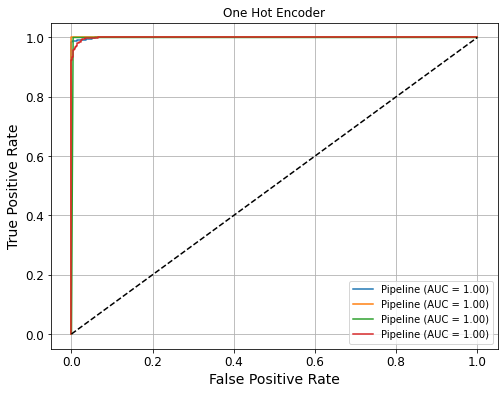

In [142]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(8, 6))                                    
ax = plt.gca()
plt.title('Label Encoder')
rf_roc = plot_roc_curve(pipeline_rf, X_le_val, y_le_val, ax=ax)
lr__roc = plot_roc_curve(pipeline_lr, X_le_val, y_le_val, ax=ax)
nb__roc = plot_roc_curve(pipeline_nb, X_le_val, y_le_val, ax=ax)
xgb__roc = plot_roc_curve(pipeline_xgb, X_le_val, y_le_val, ax=ax)
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

plt.figure(figsize=(8, 6))                                    
ax = plt.gca()
plt.title('One Hot Encoder')
rf_roc = plot_roc_curve(pipeline_rf_ohe, X_ohe_val, y_ohe_val, ax=ax)
lr__roc = plot_roc_curve(pipeline_lr_ohe, X_ohe_val, y_ohe_val, ax=ax)
nb__roc = plot_roc_curve(pipeline_nb_ohe, X_ohe_val, y_ohe_val, ax=ax)
xgb__roc = plot_roc_curve(pipeline_xgb_ohe, X_ohe_val, y_ohe_val, ax=ax)
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

Pada figure ROC AUC dengan label encoder dan onehot encoder didapatkan bahwa random forest classifier menunjukan nilai true positive rate mendekati 1 atau satu dan untuk logistic regresion pada metode onehotencoder mengalami peningkatan dibanding metode labelencoder.

### KFold

In [153]:
from sklearn.model_selection import StratifiedKFold,  cross_val_score

kf1 = StratifiedKFold(n_splits=5, shuffle=True)
kf2 = StratifiedKFold(n_splits=5, shuffle=True)

In [160]:
# menampilkan stratified KFold
for i, pipeline in enumerate(pipelines):
  score = cross_val_score(pipeline, X_le_val, y_le_val, cv= kf1, scoring="accuracy")
  print(f'Scores for each fold are {pipe_dict[i]}: {score}')
  print(f'Average score {pipe_dict[i]}: {"{:.2f}".format(score.mean())}')
  print("{} test accuracy:{}".format(pipe_dict[i],model.score(X_le_val, y_le_val)))

Scores for each fold are LogisticRegression: [0.95847751 0.94809689 0.94463668 0.93771626 0.93771626]
Average score LogisticRegression: 0.95
LogisticRegression test accuracy:0.9363321799307959
Scores for each fold are RandomForestClassifier: [0.99307958 0.98961938 0.98961938 0.98961938 0.99307958]
Average score RandomForestClassifier: 0.99
RandomForestClassifier test accuracy:0.9363321799307959
Scores for each fold are XGBClassifier: [0.89273356 0.89619377 0.89273356 0.87543253 0.9100346 ]
Average score XGBClassifier: 0.89
XGBClassifier test accuracy:0.9363321799307959
Scores for each fold are GaussianNB: [0.93425606 0.92041522 0.89619377 0.71972318 0.96193772]
Average score GaussianNB: 0.89
GaussianNB test accuracy:0.9363321799307959


In [154]:
# menampilkan stratified KFold
for i, pipeline in enumerate(pipelines2):
  score = cross_val_score(pipeline, X_ohe_val, y_ohe_val, cv= kf2, scoring="accuracy")
  print(f'Scores for each fold are {pipe_dict_ohe[i]}: {score}')
  print(f'Average score {pipe_dict[i]}: {"{:.2f}".format(score.mean())}')
  print("{} test accuracy:{}".format(pipe_dict_ohe[i],model.score(X_ohe_val, y_ohe_val)))

Scores for each fold are LogisticRegression: [1.         1.         1.         0.99653979 1.        ]
Average score LogisticRegression: 1.00
LogisticRegression test accuracy:0.9882352941176471
Scores for each fold are RandomForestClassifier: [0.98615917 0.98961938 0.99307958 0.98961938 0.99653979]
Average score RandomForestClassifier: 0.99
RandomForestClassifier test accuracy:0.9882352941176471
Scores for each fold are XGBClassifier: [0.98961938 0.99307958 0.97923875 0.9550173  0.97577855]
Average score XGBClassifier: 0.98
XGBClassifier test accuracy:0.9882352941176471
Scores for each fold are GaussianNB: [0.97231834 0.97577855 0.94809689 0.96539792 0.89965398]
Average score GaussianNB: 0.95
GaussianNB test accuracy:0.9882352941176471


Halis stratified Kfold menunjukan bahwa metode label encoder dan onehotencoder mampu mengubah hasil average score dan test accuracy untuk model selain random forest.

# Model Improvement

###GridSearchCV

In [161]:
from sklearn.model_selection import GridSearchCV

Label Encoder

In [162]:
#param_grid = {
#    "rf_classifier__criterion": ("gini","entropy"),
#    "rf_classifier__n_estimators": [100, 1000, 100],
#    "rf_classifier__max_depth": [1, 2, 3, 4, 5],
#    "rf_classifier__max_features": ("auto","sqrt","log2"),
#    "rf_classifier__verbose": [1,2,3]}

In [173]:
param_grid = {
    "rf_classifier__criterion": ("gini","entropy"),
    "rf_classifier__n_estimators": [100, 1000, 100],
    "rf_classifier__max_depth": [1, 2, 3, 4, 5],
    "rf_classifier__max_features": ("auto","sqrt"),
     }
    

In [174]:
# gridsearch ke randomforest
grid = GridSearchCV(pipeline_rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid.fit(X_le_train, y_le_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_le_val, y_le_val)))

Best params:
{'rf_classifier__criterion': 'gini', 'rf_classifier__max_depth': 5, 'rf_classifier__max_features': 'auto', 'rf_classifier__n_estimators': 100}

Best cross-validation score: 0.99
Test-set score: 0.99


best parameter untuk model random forest adalah criterion : 'gini', max_depth': 5, max_features : 'auto', estimators : 100. untuk best akurasi dan skor tes adalah 99%.

OneHotEncoder

In [169]:
# parameter untuk model logistic regression
param_grid2 = {
    "lr_classifier__C": [1.0, 0.1, 0.01],
    "lr_classifier__solver": ("newton-cg", "lbfgs", "liblinear"),
    "lr_classifier__verbose": [1,2,3]
    }

In [170]:
# gridsearch ke logistic regression
grid_2 = GridSearchCV(pipeline_lr_ohe, param_grid=param_grid2, cv=3, n_jobs=-1)
grid_2.fit(X_ohe_train, y_ohe_train)

print("Best params:\n{}\n".format(grid_2.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_2.best_score_))
print("Test-set score: {:.2f}".format(grid_2.score(X_ohe_val, y_ohe_val)))

Best params:
{'lr_classifier__C': 1.0, 'lr_classifier__solver': 'newton-cg', 'lr_classifier__verbose': 1}

Best cross-validation score: 1.00
Test-set score: 1.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


best parameter untuk model logistic regression adalah solver='newton-cg', C= 1.0, verbose= 1, random_state=random_state. untuk best akurasi dan skor tes adalah 100%.

In [175]:
# menambah hyper parameter yang telah didapatkan untuk logistic regression
pipeline_lr_ohe = Pipeline([("scaler", StandardScaler()),("lr_classifier",LogisticRegression(solver='newton-cg', C= 1.0, verbose= 1, random_state=random_state))])
pipeline_lr_ohe.fit(X_ohe_train,y_ohe_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr_classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='newton-cg', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

In [206]:
# menambah hyper parameter yang telah didapatkan untuk random forest
pipeline_rf1 = Pipeline([("scaler", StandardScaler()),("rf_classifier",RandomForestClassifier(criterion="gini",n_estimators= 100 ,max_depth=5, max_features=('auto')))])
pipeline_rf1.fit(X_le_train,y_le_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf_classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [207]:
# melihat hasil akhir dari test
evaluate(pipeline_rf1, X_le_train, X_le_test, y_le_train, y_le_test)

evaluate(pipeline_lr_ohe, X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.981995     1.000000  0.990503     0.990998      0.990674
recall        1.000000     0.980296  0.990503     0.990148      0.990503
f1-score      0.990916     0.990050  0.990503     0.990483      0.990498
support    2618.000000  2436.000000  0.990503  5054.000000   5054.000000
ACCURACY SCORE:
0.9905
CONFUSION MATRIX:
[[2618    0]
 [  48 2388]]

TESTING RESULTS: 
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.989424    1.000000  0.994462     0.994712      0.994520
recall       1.000000    0.988506  0.994462     0.994253      0.994462
f1-score     0.994684    0.994220  0.994462     0.994452      0.994460
support    842.000000  783.000000  0.994462  1625.000000   1625.000000
ACCURACY SCORE:
0.9944615384615385
CONFUSION MATRIX:
[[842   0]
 [  9 774]]

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
           

Hasil menunjukan bahwa perubahan parameter untuk kedua model memaksimalkan atau meningkatkan kinerja sehingga kedua model mendaptkan score akurasi 100% dan 99%.

In [211]:
# menampilkan confusiion matrix
y_test_pred = pipeline_rf1.predict(X_le_test)
cm=confusion_matrix(y_le_test, y_test_pred)

sns.heatmap(cm, annot=True,fmt='g',cmap="Blues")
plt.title('Confusion matrix Randoom forest')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()
y_test_pred = pipeline_lr_ohe.predict(X_ohe_test)
cm2=confusion_matrix(y_ohe_test, y_test_pred)

sns.heatmap(cm2, annot=True,fmt='g',cmap="Blues")
plt.title('Confusion matrix Logistis Regression')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

TP = edibel dan diprediksi edibel.

TN = edibel dan diprediksi poisonous.

FP = poisonous dan diprediksi edibele.

FN = poisonous dan diprediksi poisonous.

In [182]:
#mempersiapak step untuk menampilkan feature importance pada model random forest
from sklearn.inspection import permutation_importance
rf=RandomForestClassifier(criterion="gini",n_estimators= 100)
rf.fit(X_le_train, y_le_train)

# view the feature scores

feature_scores = pd.Series(rf.feature_importances_, index=X_le_train.columns).sort_values(ascending=False)
feature_scores


odor                        0.143078
gill-color                  0.130985
gill-size                   0.097352
ring-type                   0.090213
spore-print-color           0.082715
population                  0.067642
stalk-root                  0.059996
stalk-surface-below-ring    0.048896
bruises                     0.048717
gill-spacing                0.044695
stalk-surface-above-ring    0.044223
habitat                     0.034100
stalk-shape                 0.023935
cap-color                   0.018310
stalk-color-below-ring      0.015209
stalk-color-above-ring      0.015057
ring-number                 0.013148
cap-surface                 0.012398
cap-shape                   0.005577
veil-color                  0.003754
dtype: float64

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 <a list of 9 Text major ticklabel objects>)

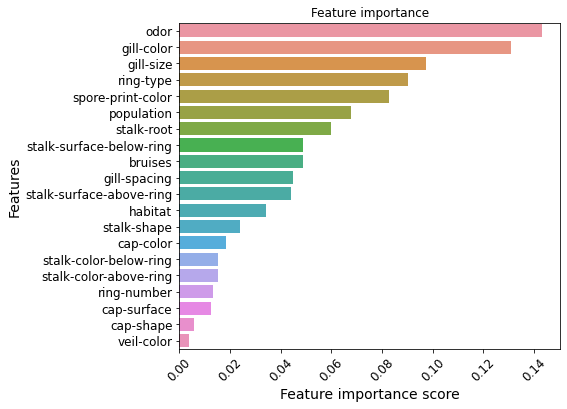

In [183]:
# plot figur Feature importance
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Feature importance")
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.xticks(rotation=45)

Feature importance pada random forest adalah odor dan yang paling rendah adalah veil color.


# Model Inference

In [194]:
# menyiapkan model
df_model=df.copy()

In [195]:
# drop feature
df_model = df.drop(columns=['gill-attachment','veil-type'])

In [196]:
# deklarasi x dan y
X_model=df_model.drop(columns=['class'])
y_model=df_model['class']

In [197]:
# label encoder pada feature x
X_model = X_model.apply(LabelEncoder().fit_transform)

In [198]:
# mengganti nama
y_model = y_model.replace({'p':'poisonous', 'e':'edible'})

In [199]:
rf=RandomForestClassifier(criterion="gini",n_estimators= 100 ,max_depth=5, max_features=('auto'))
rf.fit(X_model, y_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
X_model.head()

cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3
3          5            3          8  ...                  2           3        5
4          5            2          3  ...                  3           0        1

[5 rows x 20 columns]

In [201]:
for col in X_model:
  print(col)
  print(sorted(X_model[col].unique()))
  print()

cap-shape
[0, 1, 2, 3, 4, 5]

cap-surface
[0, 1, 2, 3]

cap-color
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

bruises
[0, 1]

odor
[0, 1, 2, 3, 4, 5, 6, 7, 8]

gill-spacing
[0, 1]

gill-size
[0, 1]

gill-color
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

stalk-shape
[0, 1]

stalk-root
[0, 1, 2, 3, 4]

stalk-surface-above-ring
[0, 1, 2, 3]

stalk-surface-below-ring
[0, 1, 2, 3]

stalk-color-above-ring
[0, 1, 2, 3, 4, 5, 6, 7, 8]

stalk-color-below-ring
[0, 1, 2, 3, 4, 5, 6, 7, 8]

veil-color
[0, 1, 2, 3]

ring-number
[0, 1, 2]

ring-type
[0, 1, 2, 3, 4]

spore-print-color
[0, 1, 2, 3, 4, 5, 6, 7, 8]

population
[0, 1, 2, 3, 4, 5]

habitat
[0, 1, 2, 3, 4, 5, 6]



In [202]:
data_baru = [[5,3,2,1,1,1,2,2,1,1,2,2,1,1,1,3,0,7,3,6]]
data_baru2 = [[1,0,2,1,1,1,2,2,1,1,2,2,1,1,1,1,0,2,1,3]]
print('Hasil yang didapat adalah termasuk jamur yang:',(rf.predict(data_baru)))
print('Hasil yang didapat adalah termasuk jamur yang:',(rf.predict(data_baru2)))

Hasil yang didapat adalah termasuk jamur yang: ['edible']
Hasil yang didapat adalah termasuk jamur yang: ['poisonous']


# kesimpulan
1. dari data diatas dapat dilihat bahwa penggunaan feature enginering dapat mempengaruhi model yang dibuat dimana feature yang digunakan adalah label encoder dan one hot encode.
2. terdapat feature yang diharuskan untuk di drop seperti feature yang hanya memiliki satu nilai maupun memiliki korelasi yang kuat terhadap feature yang lain sehingga menghindari terjadinya bias.
3. hasil yang didapat menunjukan logistic regresion merupakan model yang baik ketika menggunakan onehotencoder dan random forest emerupakan model terbaik baik menggunakan label encoder maupun onehot encoder.